1. **Descarga e Instalación de Librerías**

In [ ]:
import pandas as pd
import torch
import numpy as np
import random
import gzip
import nltk
import matplotlib.pyplot as plt
import unicodedata
import string
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [ ]:
!pip install stop-words


  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=c559ce111762da84138d3e01d73023b23ec0005b07dd10efac41b3f2c3ff8620
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

2. **Descarga de Base de Datos**

El **Dataset** se toma de Amazon Review Data --> Categoría: Software-Libros y Recursos de Aprendizaje (Físico y Digital).

El Análisis de Sentimientos se realiza respecto a las Reviews.

In [ ]:
#Montar Drive

from google.colab import drive
drive.mount('/content/drive')

#Cargar archivo en DataFrame --> df_corpus

file_path = '//content/drive/MyDrive/Bootcamp AI&ML KC/NLP/Software.json.gz'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_corpus = pd.read_json(file_path, compression='gzip', lines=True)
df_corpus.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


3. **EDA - Análisis Exploratorio de Datos**

3.1 Cardinalidad del Vocabulario

In [ ]:
#Combinar todas las reseñas en un solo string
#Tokenización de palabras
#Obtener cardinalidad del vocabulario

all_reviews = ' '.join(df_corpus['reviewText'].astype(str))
tokens = nltk.word_tokenize(all_reviews)
vocabulario = set(tokens)
cardinalidad_vocabulario = len(vocabulario)
print("Cardinalidad del vocabulario:", cardinalidad_vocabulario)

Cardinalidad del vocabulario: 250760


3.2 Distribución de Reviews por Número de Estrellas --> Overall

In [ ]:
#Número total de reviews del Dataset
total_reviews = df_corpus['reviewText'].count()
print("Número total de reviews en 'reviewText':", total_reviews)

Número total de reviews en 'reviewText': 459370


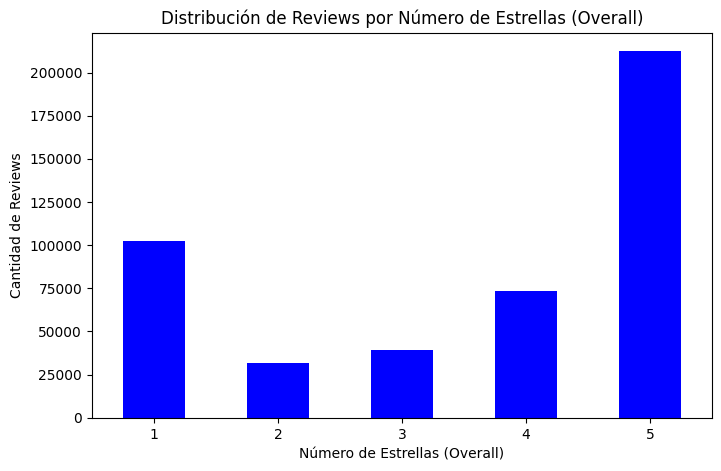

In [ ]:
# Distribución de reviews por número de estrellas (Overall)
# Gráfico de barras (Distribución de Reviews)

star_distribution = df_corpus['overall'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
star_distribution.plot(kind='bar', color='blue')
plt.title('Distribución de Reviews por Número de Estrellas (Overall)')
plt.xlabel('Número de Estrellas (Overall)')
plt.ylabel('Cantidad de Reviews')
plt.xticks(rotation=0)
plt.show()



3.3 Nº de reviews positivas y negativas

In [ ]:
#Umbral de Reviews --> Positivas y Negativas (1 a 3 = Negativas, 4 a 5 = Positivas)
#Crear nueva columna --> Sentimiento (Umbrales)
#Contar número de reseñas positivas y negativas

umbral_negativo = 3
umbral_positivo = 4
df_corpus['sentimiento'] = df_corpus['overall'].apply(lambda x: 'negativa' if x <= umbral_negativo else 'positiva')
conteo_positivas = df_corpus[df_corpus['sentimiento'] == 'positiva']['sentimiento'].count()
conteo_negativas = df_corpus[df_corpus['sentimiento'] == 'negativa']['sentimiento'].count()
print("No. de reviews positivas:", conteo_positivas)
print("No. de reviews negativas:", conteo_negativas)

No. de reviews positivas: 286048
No. de reviews negativas: 173388


3.4 N-grams más frecuentes

In [ ]:
#Combinar Reviews en un solo string
#Tokenizar palabras
#Función --> Obtener n-grams más frecuentes
#Bigramas más frecuentes (n=2)
#Trigramas más frecuentes (n=3)
#Mostrar n-grams más frecuentes

all_reviews = ' '.join(df_corpus['reviewText'].astype(str))
tokens = nltk.word_tokenize(all_reviews)
def obtener_ngrams(texto, n):
    ngramas = ngrams(texto, n)
    return ngramas

bigramas = obtener_ngrams(tokens, 2)
frecuencia_bigramas = Counter(bigramas)
n_bigramas_mas_frecuentes = frecuencia_bigramas.most_common(10)

trigramas = obtener_ngrams(tokens, 3)
frecuencia_trigramas = Counter(trigramas)
n_trigramas_mas_frecuentes = frecuencia_trigramas.most_common(10)

print("Bigramas más frecuentes:")
print(n_bigramas_mas_frecuentes)

print("\nTrigramas más frecuentes:")
print(n_trigramas_mas_frecuentes)

Bigramas más frecuentes:
[(('.', 'I'), 451526), ((',', 'and'), 140682), (('.', 'The'), 136279), (('.', 'It'), 134458), (('I', 'have'), 131916), ((',', 'but'), 118073), ((',', 'I'), 116557), (('of', 'the'), 107732), (('.', 'This'), 80002), (('in', 'the'), 75373)]

Trigramas más frecuentes:
[(('.', 'I', 'have'), 59614), (('!', '!', '!'), 32001), (('.', 'If', 'you'), 28723), (('.', 'This', 'is'), 26290), (('.', 'I', 'am'), 24687), (('.', 'It', 'is'), 24656), (('I', 'do', "n't"), 24349), (('.', 'I', "'ve"), 23796), (('.', 'It', "'s"), 22922), (('.', 'I', 'was'), 20867)]


3.5 Nubes de palabras

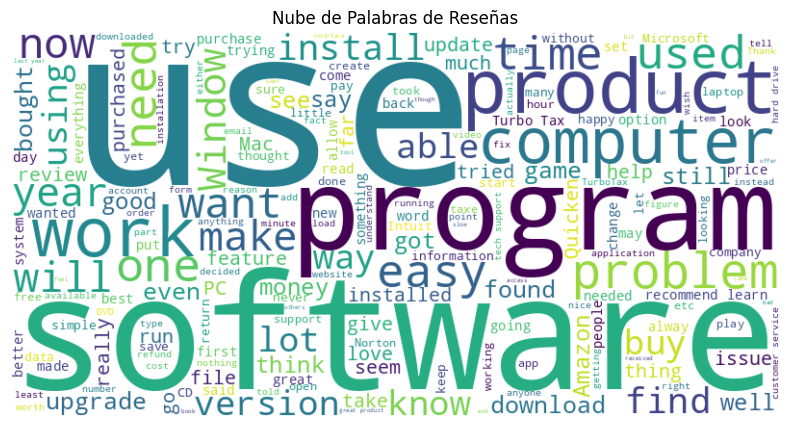

In [ ]:
#Crear Set --> Objeto WordCloud
#Mostrar nube de palabras (WordCloud)

all_reviews = ' '.join(df_corpus['reviewText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Reviews")
plt.show()

3.6 Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec. Nota: (elegir 4-5 palabras y pintar las top 10 más similares)

[('software', 178033), ('use', 146150), ('product', 144596), ('program', 136464), ('would', 113958), ('version', 113588), ('get', 105428), ('one', 104751), ('like', 99241), ('windows', 98445), ('time', 97900), ('computer', 89761), ('great', 87803), ('work', 82604), ('good', 80096), ('used', 79049), ('new', 76348), ('years', 75877), ('using', 75699), ('easy', 73087)]


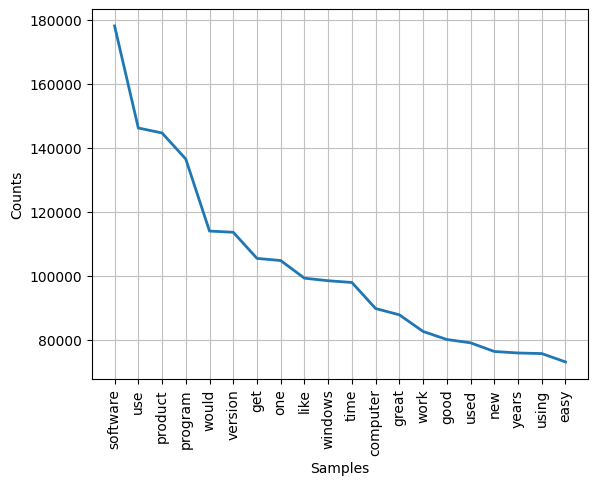

In [ ]:
#Tokenizar
#Quitar palabras comunes (stop words)
#Contar la frecuencia de palabras --> Objeto FreqDist
#Visualizar palabras más frecuentes
#Graficar histograma de las palabras más frecuentes

palabras = nltk.word_tokenize(all_reviews)
stop_words = set(stopwords.words('english'))
palabras_filtradas = [palabra.lower() for palabra in palabras if palabra.isalnum() and palabra.lower() not in stop_words]
freq_dist = FreqDist(palabras_filtradas)

print(freq_dist.most_common(20))

freq_dist.plot(20, cumulative=False)
plt.show()

<ipython-input-9-b562910cf12a>:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


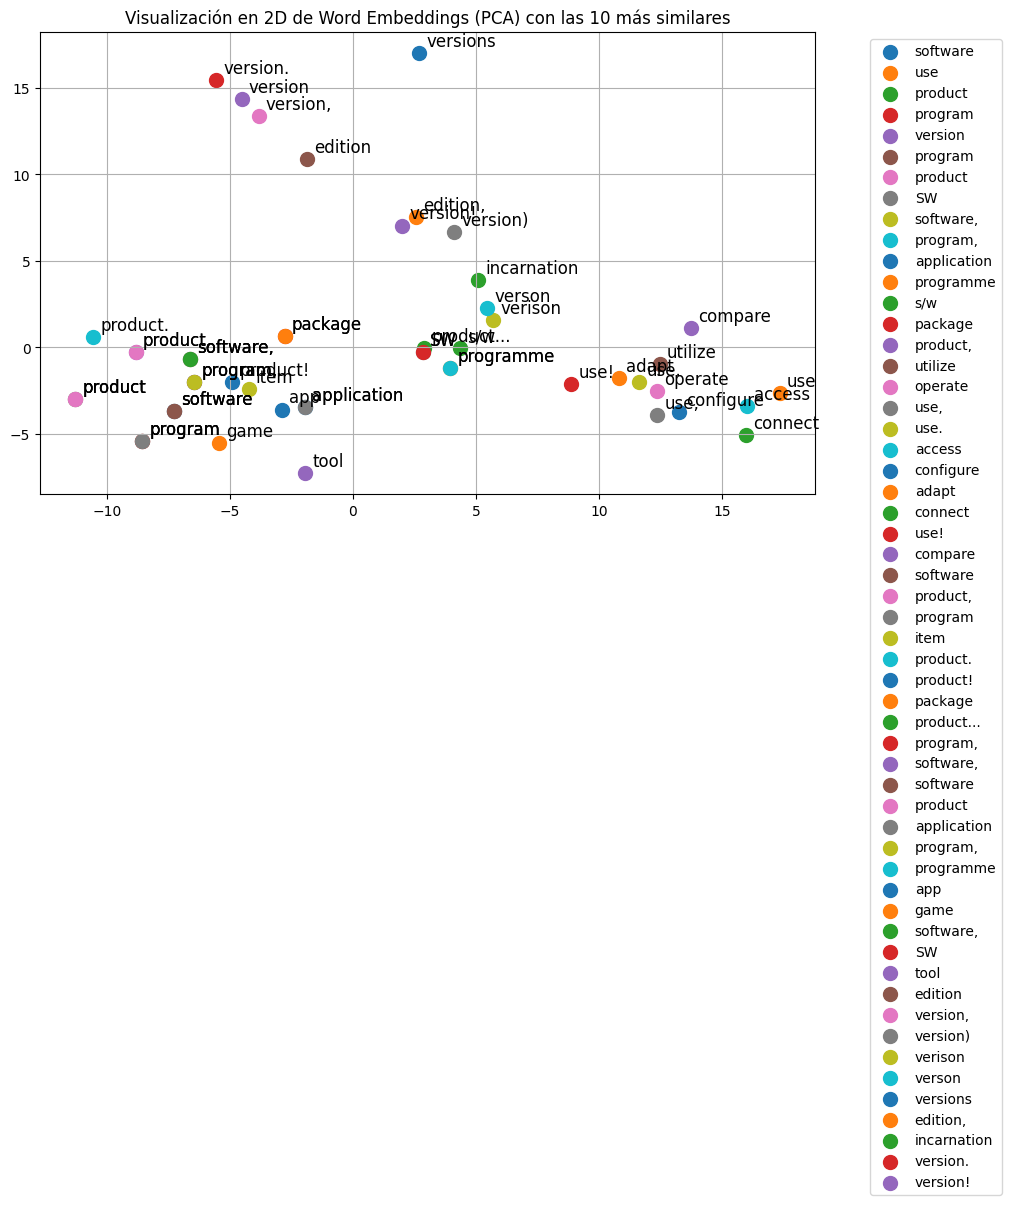

In [ ]:
#Tokenizar
#Establecer Word2Vec
#Elegir 4-5 palabras clave
#10 palabras +similares por c/palabra clave
#Representaciones vectoriales de --> palabras clave y sus similares
#Reducción de dimensionalidad a 2D con PCA
#DataFrame para palabras y sus coordenadas en 2D
#Visualizar palabras y sus coordenadas en 2D
#Registrar las palabras en gráfico

corpus = df_corpus['reviewText'].tolist()
tokenized_corpus = []

for text in corpus:
    if isinstance(text, str):
        tokenized_corpus.append(text.split())
    else:
                tokenized_corpus.append([])

modelo_w2v = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=5, sg=0)

palabras_clave = ['software', 'use', 'product', 'program', 'version']
palabras_similares = {}
for palabra in palabras_clave:
    similares = modelo_w2v.wv.most_similar(palabra, topn=10)
    palabras_similares[palabra] = [word for word, _ in similares]

palabras_y_similares = palabras_clave + [word for _, sim in palabras_similares.items() for word in sim]
embeddings = [modelo_w2v.wv[palabra] for palabra in palabras_y_similares]

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

df_word_vectors = pd.DataFrame(embeddings_2d, index=palabras_y_similares, columns=['x', 'y'])

plt.figure(figsize=(10, 6))
for palabra, (x, y) in df_word_vectors.iterrows():
    plt.scatter(x, y, marker='o', label=palabra, s=100)

for palabra, (x, y) in df_word_vectors.iterrows():
    plt.annotate(palabra, (x, y), fontsize=12, xytext=(5, 5), textcoords='offset points', rotation=0)

plt.title("Visualización en 2D de Word Embeddings (PCA) con las 10 más similares")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

3.7 Conclusiones de la exploración

a. En el dataframe se evidenciaron las siguientes Columnas: overall, verified,	reviewTime,	reviewerID,	asin,	style,	reviewerName,	reviewText,	summary,	unixReviewTime,	vote,	image. Para los análisis y procesamiento se utilizaron las columnas overall y reviewText.

b. La Cardinalidad del vocabulario permitió observar la diversidad léxica en los datos. En este set de Reviews hay un total de 250,760 palabras únicas o diferentes.

c. La Distribución de reviews por número de estrellas (overall), permitió validar la información sobre la satisfacción de los usuarios, se evidencia en un rango de 1 a 5. En orden de may-men se observa: 5, 1, 4, 3, 2. Se definieron dos rangos: (1 a 3=Negativas) (4 a 5=Positivas). La clasificación del sentimiento muestra: No. de reviews positivas: 286048 y No. de reviews negativas: 173388

d. El análisis de N-grams más frecuentes reveló las combinaciones de palabras más comunes en los reviews.

e. Los WordClouds permitieron una representación visual de las palabras más frecuentes en los reviews, facilitando la identificación de términos destacados. Se observaron palabras claves tales como: 'software', 'use', 'product', 'program', 'version'.

f. La visualización en 2D de Word Embeddings muestra relaciones semánticas entre palabras, permitiendo ver similitudes conceptuales entre términos clave.